In [1]:
import os                           
from PIL import Image               # Python Imaging Library
import numpy as np                  # Array computing
import matplotlib.pyplot as plt     # Python plotting package
import sklearn.preprocessing

In [2]:
path ="C:/Users/Carla/PycharmProjects/GDSA/Data"
from os.path import isfile, join

In [3]:
# Obtenir tots els fitxers de la carpeta TRAIN   
files_train = [f for f in os.listdir(path+"/train") if isfile(join(path+"/train", f))]

# Guardar imatges de train en una matriu
x_train = np.array([np.array(Image.open(path+"/train/"+file)) for file in files_train])

# Obtener tots els fitxers a la carpeta TEST
files_test = [f for f in os.listdir(path+"/test") if isfile(join(path+"/test", f))]
# Guardar imatges de test en una matriu
x_test = np.array([np.array(Image.open(path+"/test/"+file)) for file in files_test])

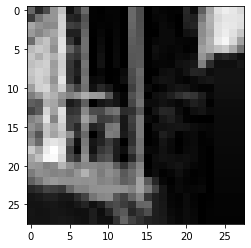

In [4]:
plt.imshow(x_train[1,:,:], cmap='gray')

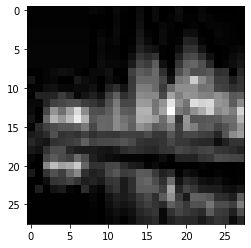

In [5]:
plt.imshow(x_test[1,:,:], cmap='gray')

In [6]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape)

x_train shape: (1671, 28, 28)
x_test shape: (1006, 28, 28)


In [7]:
Num_train = len(x_train[:,1,1])         # Nombre total de les imatges
dimx_train = len(x_train[1,:,1])        # Altura de imatge
dimy_train = len(x_train[1,1,:])    # Amplada de imatge

Num_test = len(x_test[:,1,1])
dimx_test = len(x_test[1,:,1])
dimy_test = len(x_test[1,1,:])

In [8]:
x_train = x_train.reshape(Num_train, dimx_train*dimy_train);
print("x_train shape:", x_train.shape) 
x_test = x_test.reshape(Num_test, dimx_test*dimy_test);
print("x_test shape:", x_test.shape)

x_train shape: (1671, 784)
x_test shape: (1006, 784)


In [9]:
x_train_n = sklearn.preprocessing.normalize(x_train)
x_test_n = sklearn.preprocessing.normalize(x_test)


In [10]:
x_train_n = x_train_n.transpose()
sim = np.matmul(x_test_n, x_train_n)

In [11]:
print(sim)
print("sim shape:", sim.shape)

[[0.89130648 0.62502844 0.88786777 ... 0.89060653 0.88488731 0.87715247]
 [0.58364935 0.38799913 0.52176916 ... 0.66453473 0.57603882 0.64120548]
 [0.81099554 0.62141291 0.81234045 ... 0.8295996  0.83537228 0.85219329]
 ...
 [0.5628155  0.56467384 0.62484501 ... 0.71020835 0.66353141 0.79391897]
 [0.89647487 0.61967927 0.86812737 ... 0.89253112 0.8812492  0.86218112]
 [0.78529079 0.62439812 0.79284172 ... 0.85490853 0.83498763 0.86817259]]
sim shape: (1006, 1671)


In [12]:
ranks = np.argsort(sim, axis=1)[:,::-1]


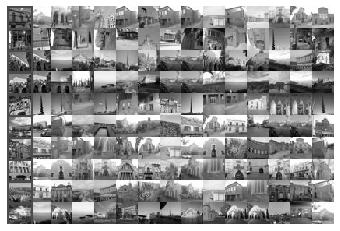

In [13]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (Num_train, dimx_train, dimy_train))
x_test = np.reshape(x_test, (Num_test, dimx_test, dimy_test))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 90 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()